In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [3]:
train_data_dir = r'C:\Users\johns\Desktop\TFG\NA\train'
validation_data_dir = r'C:\Users\johns\Desktop\TFG\NA\valid'

In [4]:
width_shape = 224
height_shape = 224
epochs = 100
num_classes = len(os.listdir(train_data_dir))
batch_size = 32
image_shape = (224,224,3)

Found 3860 images belonging to 24 classes.
Found 120 images belonging to 24 classes.


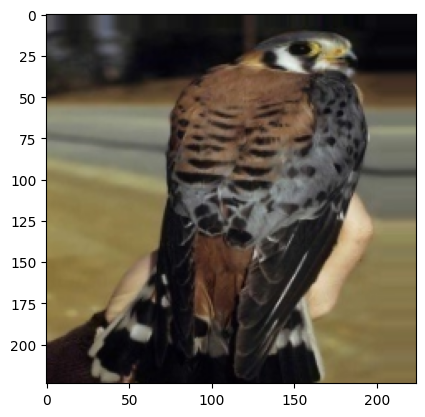

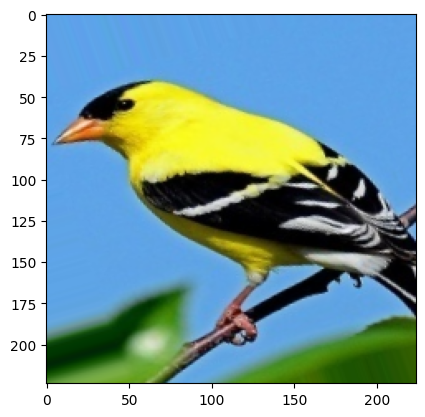

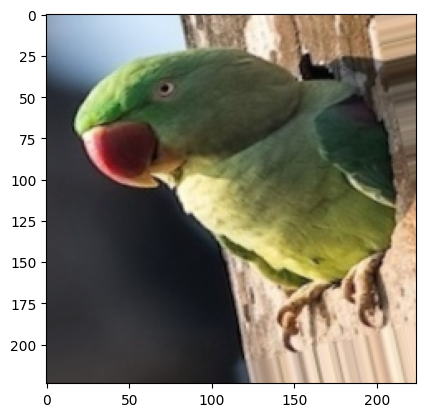

In [5]:
from keras.applications.resnet_v2 import preprocess_input

# Data generators with data augmentation
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(height_shape, width_shape),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = valid_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(height_shape, width_shape),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

for _ in range(3):
    img, label = next(train_generator)
    plt.imshow(img[0])
    plt.show()

In [21]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
import math

## Define the input
inputs = layers.Input(shape=(height_shape, width_shape, 3))

# Load the EfficientNetB0 model without the top classification layer
base_model = EfficientNetB0(include_top=False, weights=None, input_tensor=inputs)

# Add a global average pooling layer
x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2, name="top_dropout")(x)

# Add the final classification layer
outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

# Define el callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Calcular steps_per_epoch y validation_steps
num_train_images = train_generator.samples
num_val_images = validation_generator.samples

steps_per_epoch = math.ceil(num_train_images / batch_size)
validation_steps = math.ceil(num_val_images / batch_size)

# Entrena el modelo
hist = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_10 (Rescaling)       (None, 224, 224, 3)  0           ['input_17[0][0]']               
                                                                                                  
 normalization_10 (Normalizatio  (None, 224, 224, 3)  7          ['rescaling_10[0][0]']           
 n)                                                                                               
                                                                                            

In [22]:
model.save(r"C:\Users\johns\Desktop\TFG\NA\EfficientNet\custom_EfficientNet_NAmodel.h5")

In [23]:
def plotTraining(hist, epochs, typeData):

    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-b',label='Training Validate')


    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18)
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

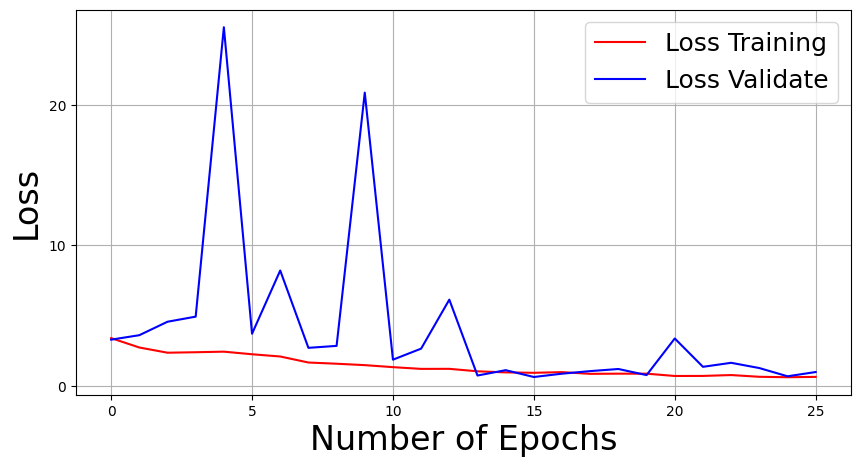

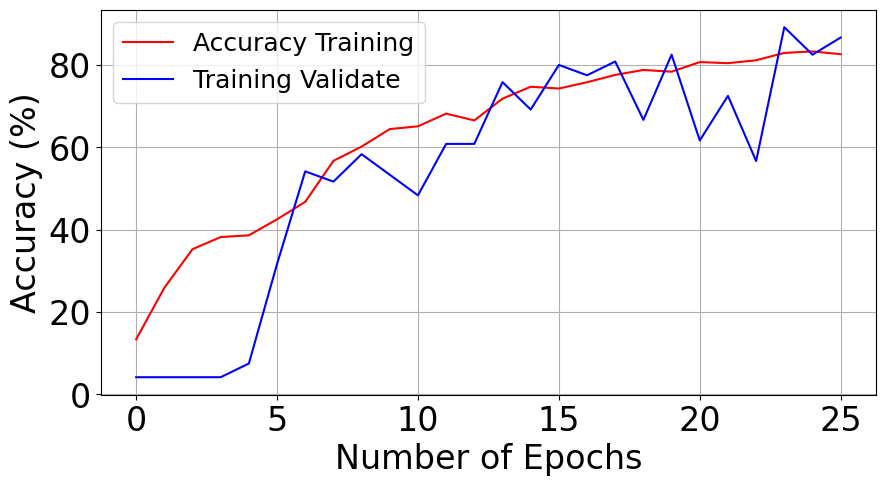

In [24]:
num_epochs_done = len(hist.history['loss'])

plotTraining(hist, num_epochs_done, "loss")
plotTraining(hist, num_epochs_done, "accuracy")
plotTraining(hist, num_epochs_done, "val_loss")
plotTraining(hist, num_epochs_done, "val_accuracy")

AFRICAN OYSTER CATCHER


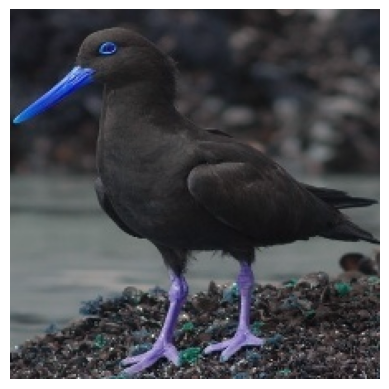

In [25]:
import cv2
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

names = ['ABBOTTS BABBLER',
          'ABBOTTS BOOBY',
          'ABYSSINIAN GROUND HORNBILL',
          'AFRICAN CROWNED CRANE',
          'AFRICAN EMERALD CUCKOO',
          'AFRICAN FIREFINCH',
          'AFRICAN OYSTER CATCHER',
          'AFRICAN PIED HORNBILL',
          'AFRICAN PYGMY GOOSE',
          'ALBATROSS',
          'ALBERTS TOWHEE',
          'ALEXANDRINE PARAKEET',
          'ALPINE CHOUGH',
          'ALTAMIRA YELLOWTHROAT',
          'AMERICAN AVOCET',
          'AMERICAN BITTERN',
          'AMERICAN COOT',
          'AMERICAN DIPPER',
          'AMERICAN FLAMINGO',
          'AMERICAN GOLDFINCH',
          'AMERICAN KESTREL',
          'AMERICAN PIPIT',
          'AMERICAN REDSTART',
          'AMERICAN ROBIN']

# cargar el modelo
modelt = load_model(r"C:\Users\johns\Desktop\TFG\NA\EfficientNet\custom_EfficientNet_NAmodel.h5")

# ruta de la imagen
# imaget_path = "/content/drive/MyDrive/TFG/dataset/test/JILGUERO EUROPEO/15.jpg"
imaget_path = r"C:\Users\johns\Desktop\TFG\NA\test\AFRICAN OYSTER CATCHER\2.jpg"

# cargar y redimensionar la imagen
imaget = load_img(imaget_path, target_size=(width_shape, height_shape))
imaget = img_to_array(imaget)
imaget = imaget.reshape((1,) + imaget.shape)

# preprocesar la imagen
xt = imaget / 255.0  # Normalizar la imagen

# hacer predicciones
preds = modelt.predict(xt)

# obtener la clase predicha
predicted_class = np.argmax(preds)
class_name = names[predicted_class]

print(class_name)

# mostrar la imagen
plt.imshow(cv2.cvtColor(imaget.reshape(width_shape, height_shape, 3).astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 121 images belonging to 24 classes.


C:\Users\johns\AppData\Local\Temp\ipykernel_18644\174579920.py:29: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator, steps=len(test_generator))


              precision    recall  f1-score   support

           0     0.5000    0.2000    0.2857         5
           1     1.0000    0.6000    0.7500         5
           2     0.6667    0.8000    0.7273         5
           3     0.6667    0.8000    0.7273         5
           4     1.0000    1.0000    1.0000         5
           5     0.7143    1.0000    0.8333         5
           6     0.8333    1.0000    0.9091         5
           7     0.6667    0.8000    0.7273         5
           8     0.8333    1.0000    0.9091         5
           9     1.0000    0.8000    0.8889         5
          10     1.0000    0.8000    0.8889         5
          11     1.0000    1.0000    1.0000         5
          12     1.0000    0.8000    0.8889         5
          13     0.5714    0.8000    0.6667         5
          14     0.8000    0.8000    0.8000         5
          15     0.7143    1.0000    0.8333         5
          16     1.0000    1.0000    1.0000         5
          17     1.0000    

<Figure size 1500x1500 with 0 Axes>

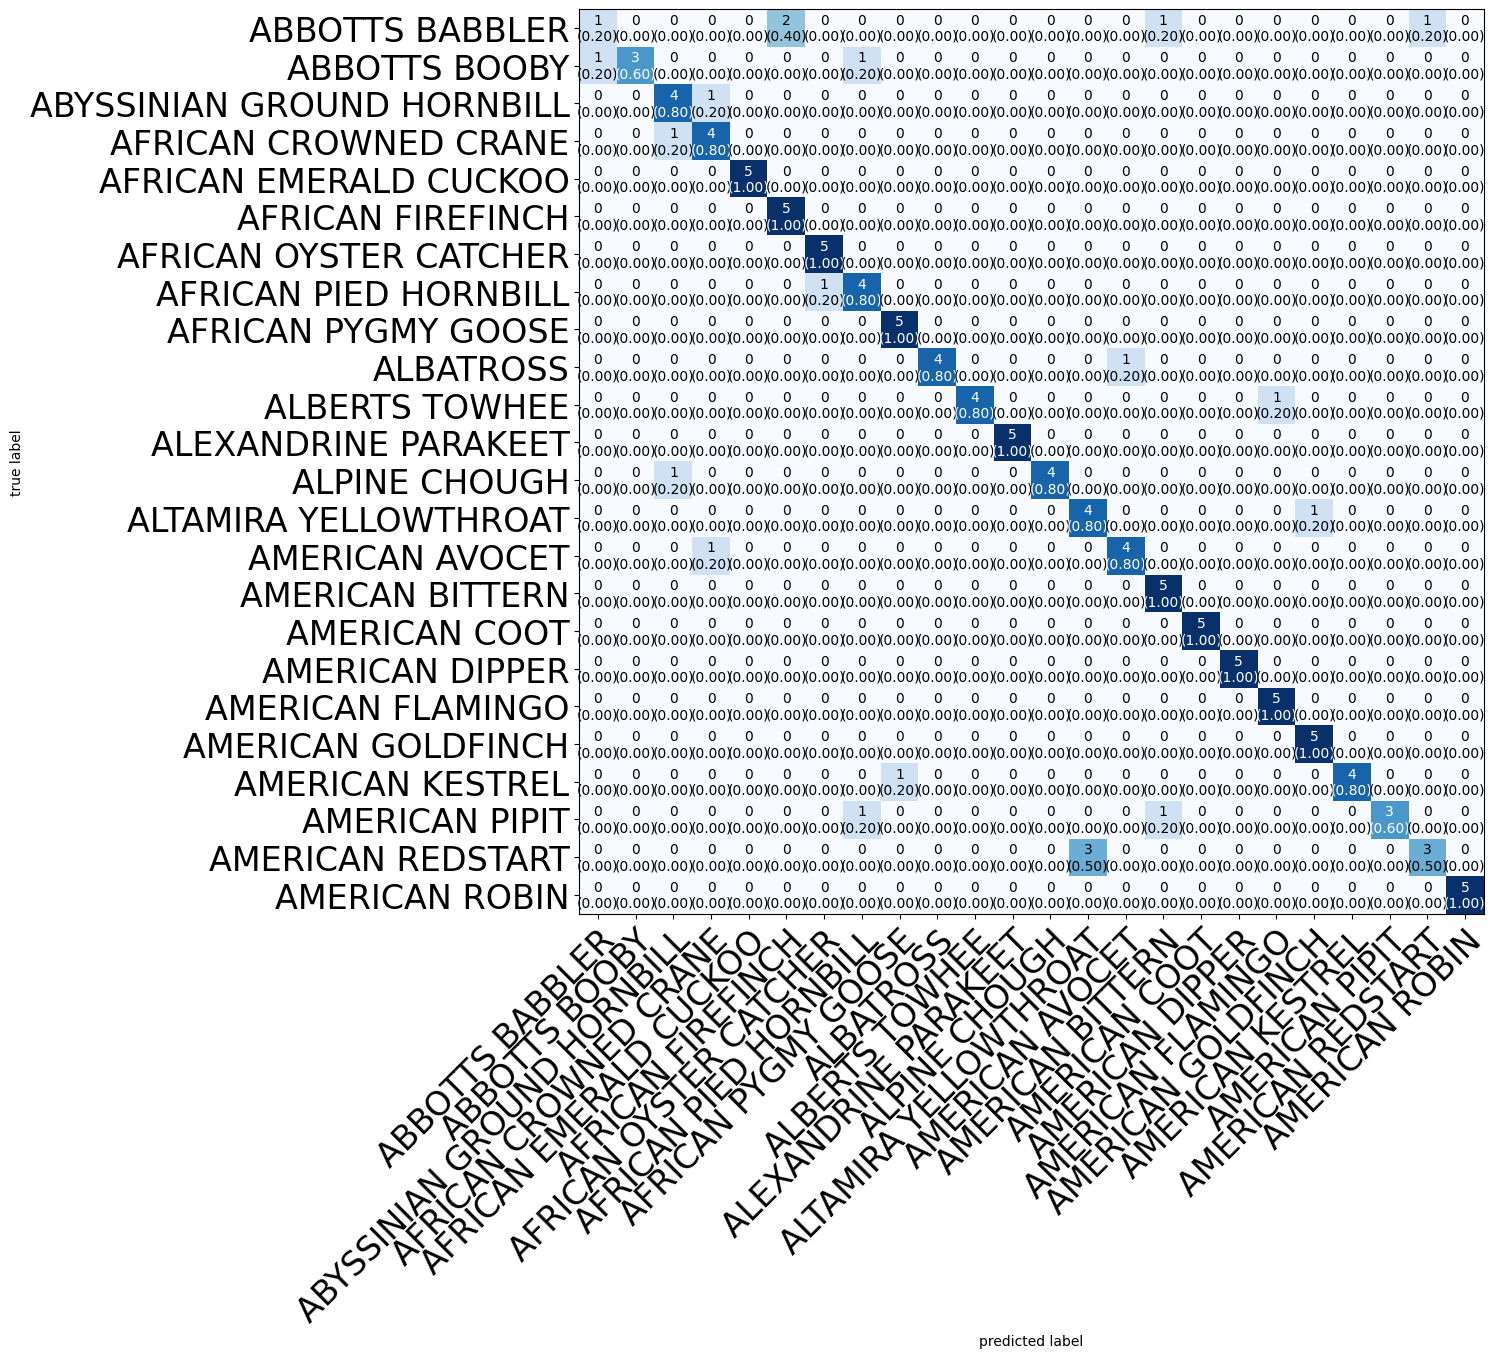

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline

# Definir el generador de datos de prueba
test_data_dir = r'C:\Users\johns\Desktop\TFG\NA\test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(height_shape, width_shape),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

# Load the model
custom_Model= load_model(r"C:\Users\johns\Desktop\TFG\NA\EfficientNet\custom_EfficientNet_NAmodel.h5")

# Make predictions
predictions = custom_Model.predict_generator(generator=test_generator, steps=len(test_generator))
y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

# Map class names to class indices
class_indices = test_generator.class_indices
names = list(class_indices.keys())

# Generate confusion matrix
conf_matrix = confusion_matrix(y_real, y_pred)

# Plot confusion matrix
plt.figure(figsize=(15, 15))

plot_confusion_matrix(conf_mat=conf_matrix, figsize=(15, 15), class_names=names, show_normed=True)
plt.tight_layout()

# Print classification report
print(classification_report(y_real, y_pred, digits = 4))

In [27]:
print(y_real)

[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 22 23 23 23 23
 23]


In [28]:
print(y_pred)

[ 5  5 22 15  0  1  7  0  1  1  3  2  2  2  2  3  2  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  6  7  8  8  8  8  8 14  9  9
  9  9 10 10 10 18 10 11 11 11 11 11 12 12 12  2 12 19 13 13 13 13 14  3
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20  8 20 20 21  7 21 15 21 22 22 13 13 22 13 23 23 23 23
 23]
